# Steps to follow
    - First create a population set with large amount of integers or real numbers.
    - create a function to select random numbers from the population and calculate their mean, how many numbers to be selected is more than or equal to 30 (CLT) - genreated randomly
    - How many times the sampling happens is decided by the user. (since this does not affect the CLT)
    - calculate sample mean and compare with population mean
    - plot the distribution of sample means

In [8]:
import numpy as np
import random

popultaion = [random.randint(1,10000) for _ in range(1000)]

In [ ]:
population_mean = sum(popultaion)/1000
population_mean

5100.092

In [94]:
def sampler(lst):
    size = random.randint(30,130)
    new_lst = [random.choice(lst) for _ in range(size)]
    new_lst_mean = sum(new_lst) / size
    return size, new_lst_mean
    

In [46]:
sampler(popultaion)

(62, 5730.129032258064)

In [74]:
import pandas as pd
data = [sampler(popultaion) for _ in range(100)]
df = pd.DataFrame(data, columns=['sample_size', 'sample_mean'])
df_sorted = df.sort_values(by='sample_size', ascending=True)
df_sorted

,sample_size,sample_mean
55,32,5526.718750
32,34,5069.441176
8,35,4745.857143
54,35,5448.257143
91,37,5170.351351
...,...,...
83,124,4850.596774
78,126,4982.611111
9,126,5030.888889
99,128,4537.468750


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns



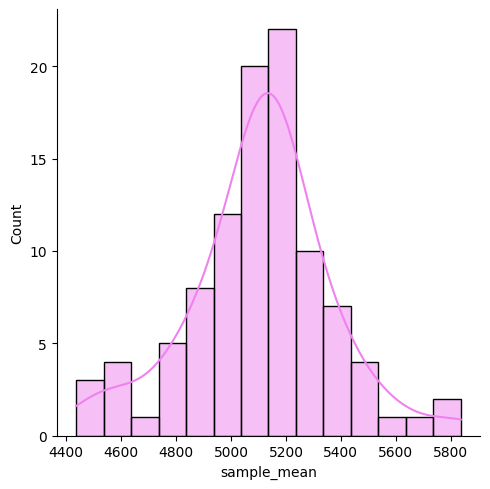

In [83]:
sns.displot(df, x = "sample_mean", kde = True, label = "sample_mean", color = "violet")

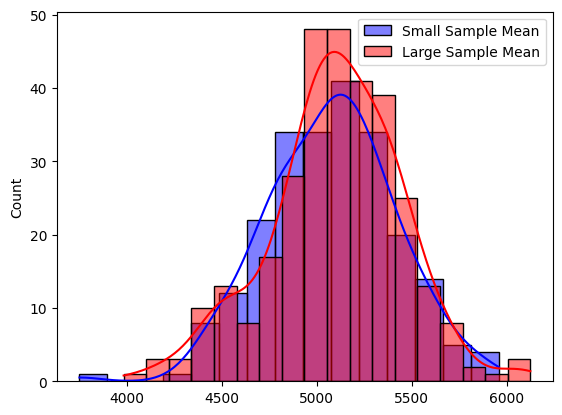

In [97]:
small_sample_mean = [sampler(popultaion)[1] for _ in range(1000) if sampler(popultaion)[0]<50]
large_sample_mean = [sampler(popultaion)[1] for _ in range(1000) if sampler(popultaion)[0] >100]
sns.histplot(small_sample_mean, kde = True, label = "Small Sample Mean", color = "blue")
sns.histplot(large_sample_mean, kde = True, label = "Large Sample Mean", color = "red")
plt.legend()
plt.show()

#As sample size increases, the graph goes towards normal distribution

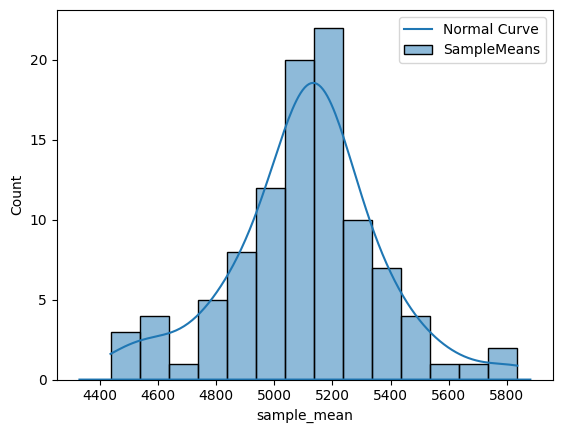

In [96]:
from scipy.stats import norm

mean = df["sample_mean"].mean()
std = df["sample_mean"].std()
x = np.linspace(mean -3*std, mean+ 3*std, 100)
plt.plot(x, norm.pdf(x,mean,std,), label = "Normal Curve")
sns.histplot(df["sample_mean"], kde = "True", label = "SampleMeans")
plt.legend()
plt.show()



In statistics, the 68–95–99.7 rule, also known as the empirical rule, and sometimes abbreviated 3sr or 3σ,\
is a shorthand used to remember the percentage of values that lie within an interval estimate in a\
normal distribution: approximately 68%, 95%, and 99.7% of the values lie within one, two, and three standard deviations of the mean, respectively.

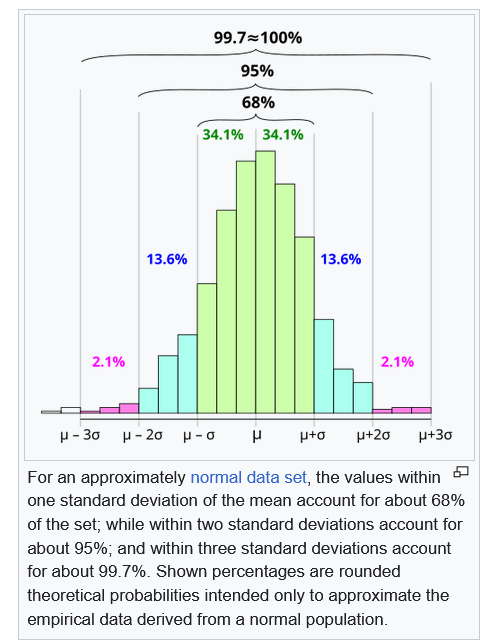